## Data prep

In [1]:
#import packages
import os
import csv
import re
import platform
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
if platform.system() == "Darwin":
    root_directory = '/Users/lorenzobarbiero/Documents/GitHub/CNN-Gait-recognition'
else:
    root_directory = None ##Francesco qui metti il tuo path

## Studying the data
### Common useful functions

In [9]:
def normalize_data(data):
    # Amplitude estimate
    norm_factor = np.percentile(data, 99) - np.percentile(data, 5)
    return (data / norm_factor)

### Skeleton

![skelly](/Users/lorenzobarbiero/Downloads/bf3d8c9ac8a0f4b5864dad3461ec4615-removebg-preview.png "Skelly")

In [3]:
# Specify the path to the CSV file
csv_file = root_directory + '/dataset/subject11/normal/trial3/Sbj11_normal_T3_S.csv'

# Read the CSV file into a pandas DataFrame
df2 = pd.read_csv(csv_file, header=None)

# Display the DataFrame
df2

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,20201124_11:34:-32.536,-0.318635,-0.022105,0.800553,-0.310994,-0.001021,0.975245,-0.309714,-0.000854,1.116042,...,-0.226072,-0.038007,1.437501,-0.352170,-0.128605,1.466909,-0.374778,-0.005038,1.497740,NaN
1,20201124_11:34:-32.555,-0.321160,0.001214,0.810166,-0.311552,0.030190,0.983210,-0.306747,0.056415,1.121132,...,-0.396988,0.063276,1.433069,-0.392816,0.218678,1.459342,-0.283336,0.161724,1.497065,NaN
2,20201124_11:34:-32.596,-0.320339,0.021721,0.813530,-0.310497,0.047856,0.986674,-0.302822,0.067664,1.125266,...,-0.392682,0.168801,1.413775,-0.268514,0.252501,1.462149,-0.266131,0.133048,1.510262,NaN
3,20201124_11:34:-32.640,-0.317737,0.036602,0.815831,-0.309952,0.063404,0.988667,-0.305857,0.080134,1.127567,...,-0.388592,0.200352,1.434507,-0.244201,0.247272,1.474838,-0.263803,0.124102,1.506087,NaN
4,20201124_11:34:-32.684,-0.314105,0.050282,0.818128,-0.308054,0.077996,0.990672,-0.306692,0.093000,1.129650,...,-0.395570,0.208197,1.451935,-0.248781,0.253389,1.483979,-0.263202,0.126772,1.499830,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,20201124_11:34:-37.424,-0.146278,2.208642,0.821725,-0.136969,2.223735,0.987401,-0.130270,2.224610,1.120435,...,-0.198362,2.277875,1.445455,-0.081363,2.370799,1.450707,-0.046496,2.254433,1.465435,NaN
148,20201124_11:34:-37.468,-0.150681,2.250115,0.817988,-0.140638,2.263045,0.983760,-0.133790,2.262207,1.116753,...,-0.204474,2.314159,1.437832,-0.084973,2.403327,1.448236,-0.054661,2.286073,1.465518,NaN
149,20201124_11:34:-37.487,-0.150881,2.292650,0.820033,-0.140239,2.304687,0.985750,-0.133245,2.302844,1.118657,...,-0.203692,2.355251,1.440652,-0.082568,2.442132,1.450526,-0.054231,2.324291,1.466689,NaN
150,20201124_11:34:-37.528,-0.153775,2.338076,0.820313,-0.143017,2.347352,0.986290,-0.136491,2.342929,1.119232,...,-0.211171,2.395688,1.435630,-0.087567,2.478285,1.451143,-0.064909,2.359896,1.472057,NaN


In [4]:
# Drop time signature column and last empty column
clean_df = df2.drop([df2.columns[0],df2.columns[-1]], axis=1)
clean_df

,1,2,3,4,5,6,7,8,9,10,...,87,88,89,90,91,92,93,94,95,96
0,-0.318635,-0.022105,0.800553,-0.310994,-0.001021,0.975245,-0.309714,-0.000854,1.116042,-0.315216,...,1.452182,-0.226072,-0.038007,1.437501,-0.352170,-0.128605,1.466909,-0.374778,-0.005038,1.497740
1,-0.321160,0.001214,0.810166,-0.311552,0.030190,0.983210,-0.306747,0.056415,1.121132,-0.301298,...,1.443572,-0.396988,0.063276,1.433069,-0.392816,0.218678,1.459342,-0.283336,0.161724,1.497065
2,-0.320339,0.021721,0.813530,-0.310497,0.047856,0.986674,-0.302822,0.067664,1.125266,-0.301959,...,1.435706,-0.392682,0.168801,1.413775,-0.268514,0.252501,1.462149,-0.266131,0.133048,1.510262
3,-0.317737,0.036602,0.815831,-0.309952,0.063404,0.988667,-0.305857,0.080134,1.127567,-0.312400,...,1.456289,-0.388592,0.200352,1.434507,-0.244201,0.247272,1.474838,-0.263803,0.124102,1.506087
4,-0.314105,0.050282,0.818128,-0.308054,0.077996,0.990672,-0.306692,0.093000,1.129650,-0.319085,...,1.472815,-0.395570,0.208197,1.451935,-0.248781,0.253389,1.483979,-0.263202,0.126772,1.499830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,-0.146278,2.208642,0.821725,-0.136969,2.223735,0.987401,-0.130270,2.224610,1.120435,-0.120883,...,1.448543,-0.198362,2.277875,1.445455,-0.081363,2.370799,1.450707,-0.046496,2.254433,1.465435
148,-0.150681,2.250115,0.817988,-0.140638,2.263045,0.983760,-0.133790,2.262207,1.116753,-0.125484,...,1.443625,-0.204474,2.314159,1.437832,-0.084973,2.403327,1.448236,-0.054661,2.286073,1.465518
149,-0.150881,2.292650,0.820033,-0.140239,2.304687,0.985750,-0.133245,2.302844,1.118657,-0.125626,...,1.446418,-0.203692,2.355251,1.440652,-0.082568,2.442132,1.450526,-0.054231,2.324291,1.466689
150,-0.153775,2.338076,0.820313,-0.143017,2.347352,0.986290,-0.136491,2.342929,1.119232,-0.131145,...,1.443770,-0.211171,2.395688,1.435630,-0.087567,2.478285,1.451143,-0.064909,2.359896,1.472057


In [5]:
#convert to np array
array_skeleton = clean_df.to_numpy()
array_skeleton.shape

(152, 96)

(152, 32, 3)


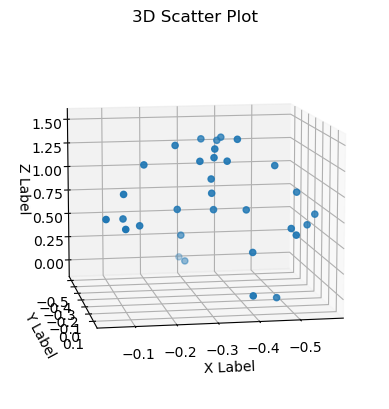

In [20]:
#reshape according to the data structure [time, joint, xyz direction]
resh=array_skeleton.reshape((152,-1,3))
print(resh.shape)

#and plot an example
plotdata = resh[0]
plotdata

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, z coordinates from the data
x = plotdata[:, 0]
y = plotdata[:, 1]
z = plotdata[:, 2]

# Create the 3D scatter plot
ax.scatter(x, y, z)
#ax.plot(x,y,z)

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

ax.view_init(elev=10, azim=80)

# Show the plot
plt.show()

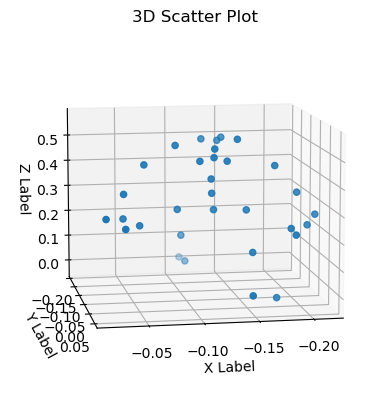

In [21]:
#normalize per trial and plot an example
resh_norm = normalize_data(resh)
resh_norm

plotdata = resh_norm[0]
plotdata

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, z coordinates from the data
x = plotdata[:, 0]
y = plotdata[:, 1]
z = plotdata[:, 2]

# Create the 3D scatter plot
ax.scatter(x, y, z)
#ax.plot(x,y,z)

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

ax.view_init(elev=10, azim=80)

# Show the plot
plt.show()

In [ ]:
# Function to create frames for the animation
#and plot an example
plotdata = resh[0]
plotdata

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, z coordinates from the data
x = plotdata[:, 0]
y = plotdata[:, 1]
z = plotdata[:, 2]

# Create the 3D scatter plot
ax.scatter(x, y, z)
ax.view_init(elev=10, azim=80)
#ax.plot(x,y,z)

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')


# Show the plot
plt.show()



def create_frame(frame_index):
    plt.clf()  # Clear the previous plot
    plotdata = resh[frame_index]
    fig = plt.figure()
    
    ax = fig.add_subplot(111, projection='3d')

    # Extract x, y, z coordinates from the data
    x = plotdata[:, 0]
    y = plotdata[:, 1]
    z = plotdata[:, 2]

    # Create the 3D scatter plot
    ax.scatter(x, y, z)
    ax.view_init(elev=10, azim=80)
    #ax.plot(x,y,z)

    # Set labels and title
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title('3D Scatter Plot')

    
    x = np.linspace(0, 2 * np.pi, 100)
    y = np.sin(x + 0.1 * frame_index)  # Vary the phase to create animation
    plt.plot(x, y)
    plt.title(f"Frame {frame_index}")
    plt.xlabel("X")
    plt.ylabel("Y")

# Number of frames in the animation
num_frames = 30

# Create an animation
animation = FuncAnimation(plt.gcf(), create_frame, frames=num_frames)

# Save the frames as a GIF
with imageio.get_writer('animation.gif', mode='I') as writer:
    for frame_index in range(num_frames):
        create_frame(frame_index)
        plt.savefig(f'frame_{frame_index}.png')  # Save each frame as a PNG
        writer.append_data(imageio.imread(f'frame_{frame_index}.png'))

# Clean up: remove temporary PNG files
import os
for frame_index in range(num_frames):
    os.remove(f'frame_{frame_index}.png')


### Sample pressure

In [10]:
# Specify the path to the CSV file
csv_file = root_directory + '/dataset/subject11/normal/trial3/Sbj11_normal_T3_P.csv'
# Read the CSV file into a pandas DataFrame
dfplate = pd.read_csv(csv_file, header=None)

# Display the DataFrame
dfplate

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#convert to np array
array_plate = dfplate.to_numpy()
#array_plate.shape[0]


128

<Axes: >

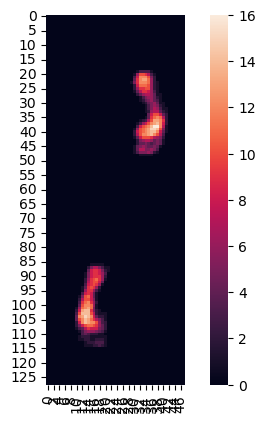

In [12]:
#plot an example
sns.heatmap(array_plate, square= True)

<Axes: >

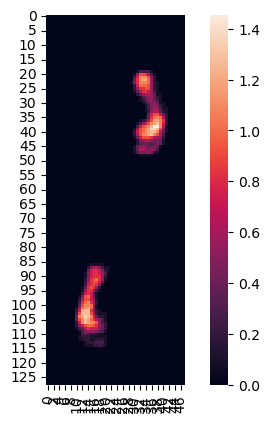

In [13]:
# normalize and plot
array_plate_norm = normalize_data(array_plate)
sns.heatmap(ddarray_plate_norm, square= True)

In [39]:
def bar (data):
    # Compute the weighted average (barycenter) along each dimension
    x_barycenter = np.average(np.arange(data.shape[0]), weights=np.sum(data, axis=1))
    y_barycenter = np.average(np.arange(data.shape[1]), weights=np.sum(data, axis=0))
    print("Barycenter coordinates (y,x) = ",x_barycenter,y_barycenter)

    # Compute the distances between each point and the barycenter
    x_distances = np.arange(data.shape[0]) - x_barycenter
    y_distances = np.arange(data.shape[1]) - y_barycenter

    # Shift the foot pressure matrix to be centered on the barycenter
    shifted_matrix = np.roll(foot_pressure_matrix, int(round(-x_distances.mean())), axis=0)
    shifted_matrix = np.roll(shifted_matrix, int(round(-y_distances.mean())), axis=1)
    
    return shifted_matrix

Barycenter coordinates (y,x) =  64.3022312373225 25.81744421906694


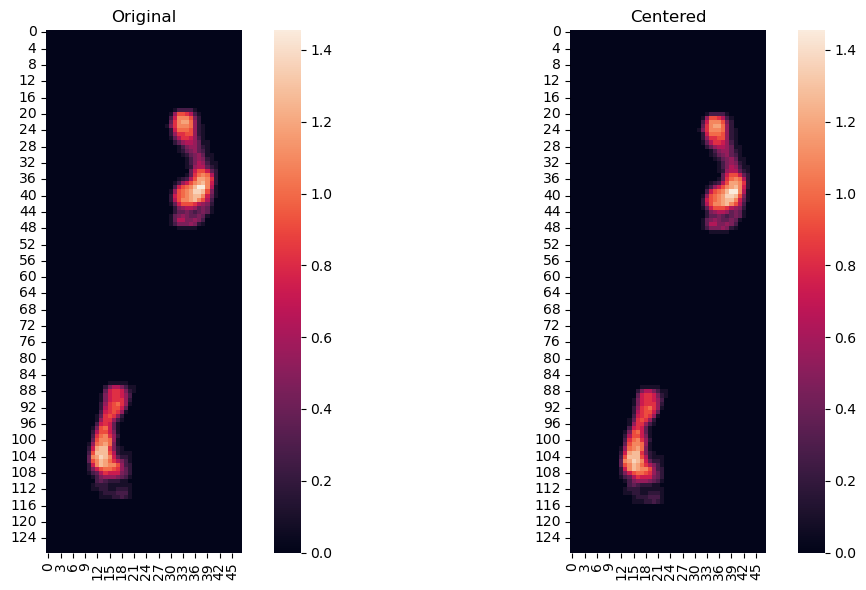

In [40]:
shifted_matrix=bar(array_plate_norm)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first heatmap
sns.heatmap(array_plate_norm, square= True, ax=axes[0])
axes[0].set_title('Original')

# Plot the second heatmap
sns.heatmap(shifted_matrix, square= True,ax=axes[1])
axes[1].set_title('Centered')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()